In [134]:
import keras_core as keras
import matplotlib.pyplot as plt
import numpy as np
mnist = keras.datasets.mnist.load_data()
fashion_mnist = keras.datasets.fashion_mnist.load_data()
fashion_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

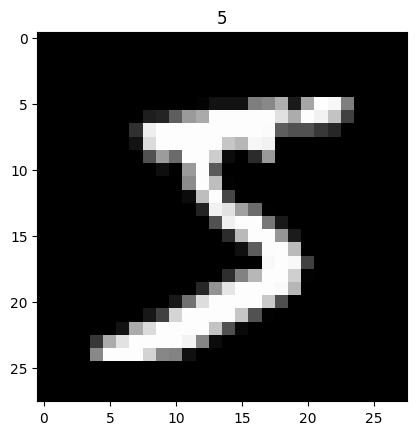

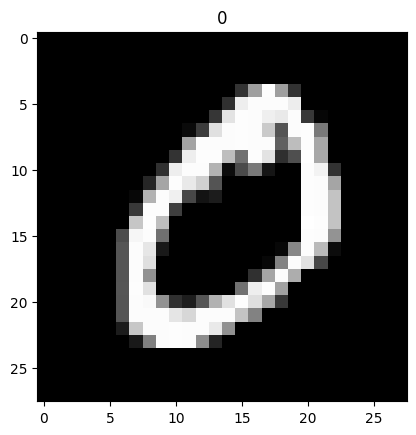

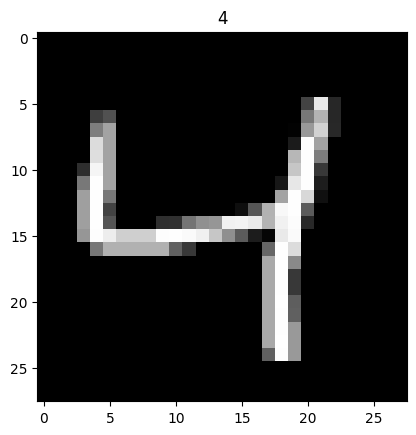

In [135]:
plt.imshow(mnist[0][0][0],"gray")
plt.title(mnist[0][1][0])
plt.show()
plt.imshow(mnist[0][0][1],"gray")
plt.title(mnist[0][1][1])
plt.show()
plt.imshow(mnist[0][0][2], "gray")
plt.title(mnist[0][1][2])
plt.show()


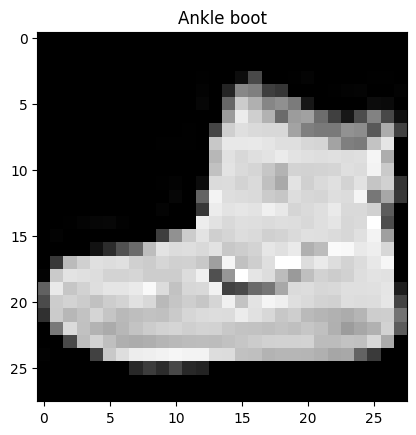

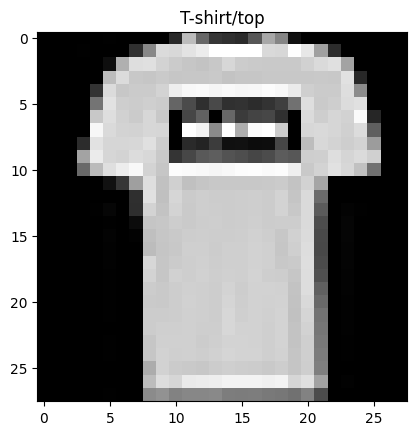

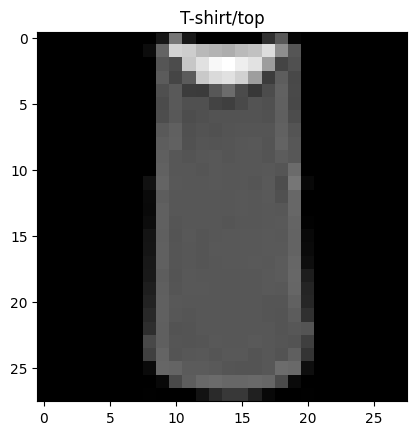

In [136]:
plt.imshow(fashion_mnist[0][0][0], "gray")
plt.title(fashion_labels[fashion_mnist[0][1][0]])
plt.show()
plt.imshow(fashion_mnist[0][0][1], "gray")
plt.title(fashion_labels[fashion_mnist[0][1][1]])
plt.show()
plt.imshow(fashion_mnist[0][0][2], "gray")
plt.title(fashion_labels[fashion_mnist[0][1][2]])
plt.show()


In [137]:

mnist_indices_train = np.arange(mnist[0][0].shape[0])
np.random.shuffle(mnist_indices_train)

mnist_indices_test = np.arange(mnist[1][0].shape[0])
np.random.shuffle(mnist_indices_test)

mnist_train_x = mnist[0][0][mnist_indices_train]
mnist_train_y = mnist[0][1][mnist_indices_train]
mnist_train_x = mnist_train_x[:len(mnist_train_x)//2]
mnist_train_y = mnist_train_y[:len(mnist_train_y)//2]

mnist_test_x = mnist[1][0][mnist_indices_test]
mnist_test_y = mnist[1][1][mnist_indices_test]
mnist_test_x = mnist_test_x[:len(mnist_test_x)//2]
mnist_test_y = mnist_test_y[:len(mnist_test_y)//2]


In [138]:

fashion_mnist_indices_train = np.arange(fashion_mnist[0][0].shape[0])
np.random.shuffle(fashion_mnist_indices_train)

fashion_mnist_indices_test = np.arange(fashion_mnist[1][0].shape[0])
np.random.shuffle(fashion_mnist_indices_test)

fashion_mnist_train_x = fashion_mnist[0][0][fashion_mnist_indices_train]
fashion_mnist_train_y = fashion_mnist[0][1][fashion_mnist_indices_train]

fashion_mnist_test_x = fashion_mnist[1][0][fashion_mnist_indices_test]
fashion_mnist_test_y = fashion_mnist[1][1][fashion_mnist_indices_test]


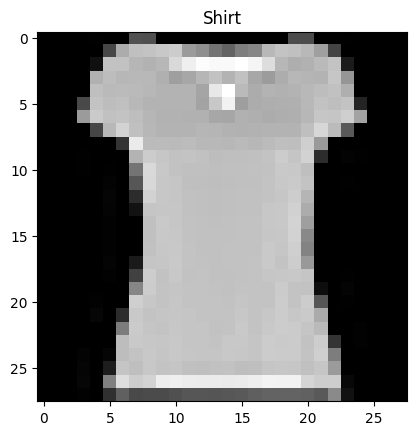

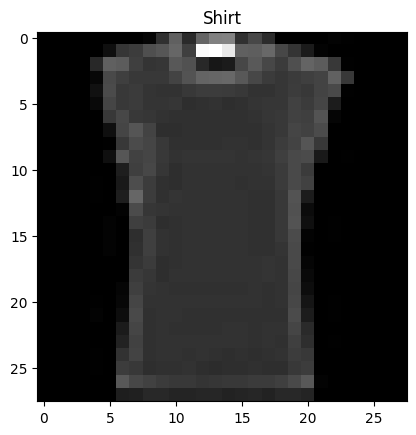

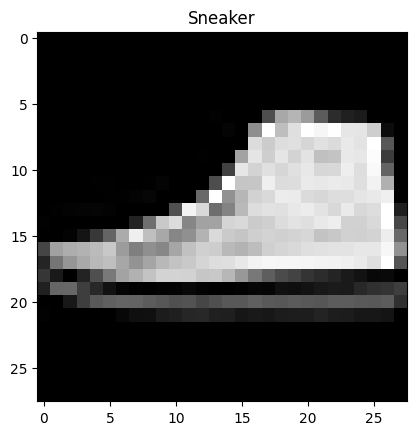

In [139]:
plt.imshow(fashion_mnist_train_x[0], "gray")
plt.title(fashion_labels[fashion_mnist_train_y[0]])
plt.show()
plt.imshow(fashion_mnist_train_x[1], "gray")
plt.title(fashion_labels[fashion_mnist_train_y[1]])
plt.show()
plt.imshow(fashion_mnist_train_x[2], "gray")
plt.title(fashion_labels[fashion_mnist_train_y[2]])
plt.show()


In [140]:

dataset_train_x = []
dataset_train_y = np.zeros(len(mnist_train_y), np.uint8)
for i in range(len(mnist_train_x)):
  dataset_train_x.append(np.concatenate(
      (fashion_mnist_train_x[i*2], mnist_train_x[i], fashion_mnist_train_x[i*2+1]), axis=1))
  if mnist_train_y[i]%2==0:
    dataset_train_y[i] = fashion_mnist_train_y[i*2]
  else:
    dataset_train_y[i] = fashion_mnist_train_y[i*2+1]

dataset_test_x = []
dataset_test_y = np.zeros(len(mnist_test_y), np.uint8)
for i in range(len(mnist_test_x)):
  dataset_test_x.append(np.concatenate(
      (fashion_mnist_test_x[i*2], mnist_test_x[i], fashion_mnist_test_x[i*2+1]), axis=1))
  if mnist_test_y[i] % 2 == 0:
    dataset_test_y[i] = fashion_mnist_test_y[i*2]
  else:
    dataset_test_y[i] = fashion_mnist_test_y[i*2+1]


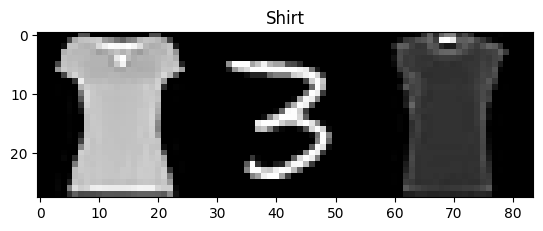

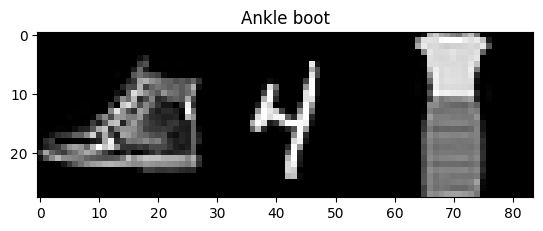

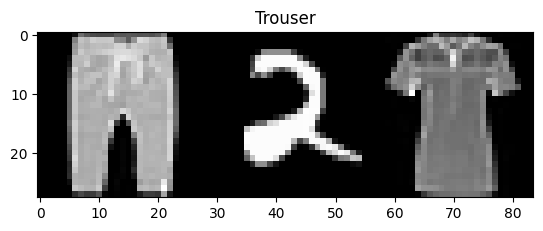

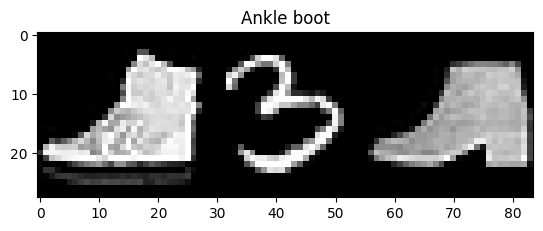

In [141]:
plt.imshow(dataset_train_x[0],"gray")
plt.title(fashion_labels[dataset_train_y[0]])
plt.show()

plt.imshow(dataset_train_x[2], "gray")
plt.title(fashion_labels[dataset_train_y[2]])
plt.show()


plt.imshow(dataset_test_x[0], "gray")
plt.title(fashion_labels[dataset_test_y[0]])
plt.show()

plt.imshow(dataset_test_x[1], "gray")
plt.title(fashion_labels[dataset_test_y[1]])
plt.show()


In [142]:
print(len(dataset_train_x),len(dataset_train_y),len(dataset_test_x), len(dataset_test_y))


30000 30000 5000 5000


In [143]:
input_shape = (28, 84, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [144]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 82, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 41, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 39, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 19, 64)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 17, 64)         │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_5 (Flatten)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_5 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_10 (Dense)                │ (None, 32)                │     16,416 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_11 (Dense)                │ (None, 10)                │        330 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 72,490 (283.16 KB)

 Trainable params: 72,490 (283.16 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
dataset_train_x = np.array(dataset_train_x)
print(dataset_train_y)
dataset_train_y = keras.utils.to_categorical(dataset_train_y,10)
# model.fit(dataset_train_x, dataset_train_y, batch_size=128, epochs=15)

[[[[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 

TypeError: 'NoneType' object is not callable